<div>
Olá, Bernardo!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>





# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados
- Primeiramente realizar a compreensão do problema, realizar a identificação e a análise e, se possível, realizar a resolução do problema identificado.

In [1]:
import pandas as pd # Importe as bibliotecas

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep= ';')# leia os conjuntos de dados em DataFrames
df_products = pd.read_csv('/datasets/products.csv', sep= ';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep= ';')
df_departments = pd.read_csv('/datasets/departments.csv', sep= ';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep= ';')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `;`.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>


In [3]:
print(df_orders.info())# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
print(df_products.info())# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
print(df_aisles.info())# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
print(df_departments.info())# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
print(df_order_products.info(show_counts=True))# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Dica: poderia usar o método `head()` para exibir uma amostra inicial dos seus dados
- O método `info()` foi utilizado para estudo inicial do conjunto de dados

</div>


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados
- Visualização geral de todas as informações dos dados

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados
- Realizar toda a preparação para uma análise de dados adequada.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
print(df_orders.duplicated().sum())# Verificar se há pedidos duplicados

print(df_orders[df_orders.duplicated()]) #Para verificar os pedidos duplicados

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

Há linhas duplicadas? Se sim, o que elas têm em comum?
- Sim, foram idetificados 15 duplicados. Todos foram feito as 2h da manha de uma Quarta-Feira

In [9]:
# Com base nas suas conclusões,
#convertendo para numeros inteiros
df_orders['order_dow'] = df_orders['order_dow'].astype(int) # verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
#filtrando
order2am = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(order2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?
- Que todos os pedidos duplicados estão nas Quartas-Feiras as 2h da manhã.

In [10]:
remove_duplicates = df_orders.drop_duplicates(inplace=True) # Remova pedidos duplicados
print(remove_duplicates)

None


In [11]:
# Verifique as linhas duplicadas mais uma vez
print(df_orders.duplicated().sum())
print()
print(df_orders.duplicated().value_counts())

0

False    478952
dtype: int64


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados
ids_duplicates = df_orders[df_orders.duplicated(subset=['order_id'])]
print(ids_duplicates['order_id'])

Series([], Name: order_id, dtype: int64)


Descreva brevemente suas conclusões e o que você fez com elas.

- Foram identificados 15 duplicados, logo em seguida removemos todos os duplicados para não interfirir na analise futuramente.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados para o dataset `orders` foram verificados
- O estudante verificou corretamente que pedidos duplicados ocorreram às 2:00 da manhã de Quarta-feira, o que pode sugerir um erro na geração dos dados.

</div>


### DataFrame `products`

In [13]:
print(df_products.duplicated().value_counts())# Verifique se há linhas completamente duplicadas

False    49694
dtype: int64


In [14]:
# Verifique apenas se há IDs de departamentos duplicados
ids_department = df_products[df_products.duplicated(subset=['department_id'])]
print(ids_department['department_id'])

4        13
6         7
7         1
9         7
10        7
         ..
49689     7
49690    14
49691    14
49692    11
49693     1
Name: department_id, Length: 49673, dtype: int64


In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products['product_name'] = df_products['product_name'].str.lower()
products_duplicates = df_products[df_products.duplicated(subset=['product_name'])]
print(products_duplicates['product_name'])

71                                                   NaN
109                                                  NaN
296                                                  NaN
416                                                  NaN
436                                                  NaN
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: product_name, Length: 1361, dtype: object


In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando
products_nun = df_products[~df_products['product_name'].isna() & df_products.duplicated(subset=['product_name'])]
print(products_nun['product_name'])

2058                                     biotin 1000 mcg
5455                    green tea with ginseng and honey
5558                              cream of mushroom soup
7558                           cinnamon rolls with icing
9037                              american cheese slices
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: product_name, Length: 104, dtype: object


Descreva brevemente suas conclusões e o que você fez com elas.
- A princípio não havia valores duplicados, mas havia produtos cadastrados tanto em letras MAIÚSCULAS quanto em minúsculas, o que pode dificultar um pouco a análise. Logo, transformamos todos os produtos para letras minúsculas e novamente fizemos a análise se havia produtos duplicados. E sim, tinha valores duplicados! Além de alguns valores 'NaN'.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os nomes dos produtos foram convertidos para `lowercase` para padronização
- As conclusões intermediárias foram apresentadas

</div>


### DataFrame `departments`

In [17]:
print(df_departments.duplicated().sum())# Verifique se há linhas completamente duplicadas

0


In [18]:
# Verifique apenas se há IDs dos produtos duplicados
ids_dep_prod = df_departments[df_departments.duplicated(subset=['department_id'])]
print(ids_dep_prod['department_id'])

Series([], Name: department_id, dtype: int64)


Descreva brevemente suas conclusões e o que você fez com elas.
- Realizei uma verificação simples para ver se possuia valores duplicados. E não foi encontrado nenhum!

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


### DataFrame `aisles`

In [19]:
print(df_aisles.duplicated().sum())# Verifique se há linhas completamente duplicadas

0


In [20]:
aisle_duplicates = df_aisles[df_aisles.duplicated(subset=['aisle_id'])]
print(aisle_duplicates['aisle_id'])# Verifique apenas se há IDs dos produtos duplicados

Series([], Name: aisle_id, dtype: int64)


Descreva brevemente suas conclusões e o que você fez com elas.
- Não foi identificado nenhum valor duplicado.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas
print(df_order_products.duplicated().sum())

0


In [22]:
# Verifique mais uma vez se há outros casos complicados de duplicados
values_nan = df_order_products.isna().sum()
print(values_nan)
print()
print(df_order_products.duplicated('add_to_cart_order').value_counts())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

True     4544942
False         65
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.
- Não foi indentificado nenhuma linha duplicada. Apenas dentro da coluna 'add_to_cart_order' mas retrata da ordem sequencial em que cada item foi colocado no carrinho.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Encontre valores ausentes na coluna 'product_name'
products_nan = df_products[df_products['product_name'].isna()]
print(products_nan)
print()
print(df_products['product_name'].isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

1258


Descreva brevemente suas conclusões.
- Filtrado para identificar os valores ausentes.

In [24]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
products_nan = df_products[df_products['product_name'].isna()]
section_100 = products_nan['aisle_id'] == 100
print(section_100.sum())

1258


Descreva brevemente suas conclusões.
- Foi identificado que possui 1258 valores ausentes e que 1258 valores estão relacionados com a seção de ID 100, logo todos os valores ausentes estão ligados com ID 100.

In [25]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
products_nan = df_products[df_products['product_name'].isna()]
department_21 = products_nan['department_id'] == 21
print(department_21.sum())

1258


Descreva brevemente suas conclusões.
- Todos os 1258 valores ausentes estão diretamente associados ao departamento de ID 21.

In [26]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
section_100 = df_aisles[df_aisles['aisle_id'] == 100]
print(section_100)
print()
department_21 = df_departments[df_departments['department_id'] == 21]
print(department_21)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Descreva brevemente suas conclusões.

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products['product_name'].loc[49552])#Confirmando se o valor foi devidamente substituído 

Unknown


Descreva brevemente suas conclusões e o que você fez com elas.

- Preenchemos todos os valores ausentes com 'Unknown' utilizando o método .fillna()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A verificação de que os produtos com nomes vazios estão associados com o `departamento==21` e `aisle==100` foi realizada.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os produtos com nomes ausentes foram preenchidos com `Unknown`.
</div>


### DataFrame `orders`

In [28]:
# Encontre os valores ausentes
value_nan = df_orders[df_orders['days_since_prior_order'].isna()]
print(value_nan)
print()
print(df_orders.isna().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
value_nan = df_orders[df_orders['days_since_prior_order'].isna()]
first_buy = value_nan['order_number'] != 1
print(first_buy.sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.
- Todos os valores ausentes se referem a pessoas que realizaram uma unica compra, pois não é possivel ter compras em dias anteriores.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante apresentou as observações sobre o atributo `days_since_prior_order`.
</div>


### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
order_products_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(order_products_nan)
print()
print(df_order_products.isna().sum())

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?
value_min = df_order_products['add_to_cart_order'].min() #valor mínimo
print(value_min)

print()

value_max = df_order_products['add_to_cart_order'].max() #valor máximo
print(value_max)

1.0

64.0


Descreva brevemente suas conclusões.
- Foram identificados os valores ausentes, além dos valores mínimo e máximo da coluna 'add_to_cart_order'.

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
ids_order_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique() #filtrando os pedidos que contem valores ausentes
print(ids_order_nan)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
order_64 = (order_products_nan.groupby('order_id').size() > 64).sum()
print(order_64)

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
count_id = df_order_products.groupby('order_id').size()
min_count = count_id.min()
print(min_count)

0
1


Descreva brevemente suas conclusões.
- Nenhum valor ausente contêm mais de 64 produtos.
- O valor mínimo é de '1'

In [49]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
print(df_order_products['add_to_cart_order'].loc[737]) #Confirmando se o valor foi devidamente substituído 

999


Descreva brevemente suas conclusões e o que você fez com elas.
- Os valores ausentes foram substituídos por '999'.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os métodos `min()` e `max()` foram utilizados para contar a quantidade mínima e máxima de produtos adicionados ao carrinho
- Os valores ausentes do atributo `add_to_cart_order` foram preenchidos. Dica: você pode preencher os valores diretamente como `int`
- As conclusões intermediárias foram apresentadas
</div>


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
values_24h = df_orders['order_hour_of_day'].unique() #selecionando todos os valores existente na coluna 'order_hour_of_day'
print(sorted(values_24h)) # imprimindo e colocando em ordem crescente para facilitar a visualização

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [36]:
values_days = df_orders['order_dow'].unique() #selecionando todos os valores existente na coluna 'order_dow' = dias da semana
print(sorted(values_days)) # imprimindo e colocando em ordem crescente para facilitar a visualização

[0, 1, 2, 3, 4, 5, 6]


Escreva suas conclusões aqui
- De acordo com a análise, as colunas 'order_hour_of_day' e 'order_dow' fazem sentido. Pois estão devidamente completas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Outras sugestões: 
- verificar o intervalo das horas do dia
- usar o método `.value_counts()`
- plotar a distribuição dessa variável
</div>


### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

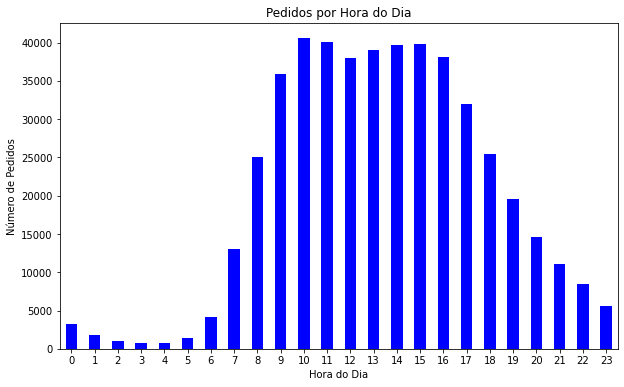

In [37]:
import matplotlib.pyplot as plt
order_per_hour = df_orders['order_hour_of_day'].value_counts().sort_index()

order_per_hour.plot(kind='bar', title='Pedidos por Hora do Dia', color='blue', figsize=(10, 6), xlabel='Hora do Dia', ylabel='Número de Pedidos', rot=0)

plt.show()

Escreva suas conclusões aqui
- De acordo com análises, o horário em que as pessoas mais fazem pedidos é das 10h às 16h.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição de compras por hora do dia
- As conclusões foram apresentadas
</div>


### [A3] Em que dia da semana as pessoas fazem compras?

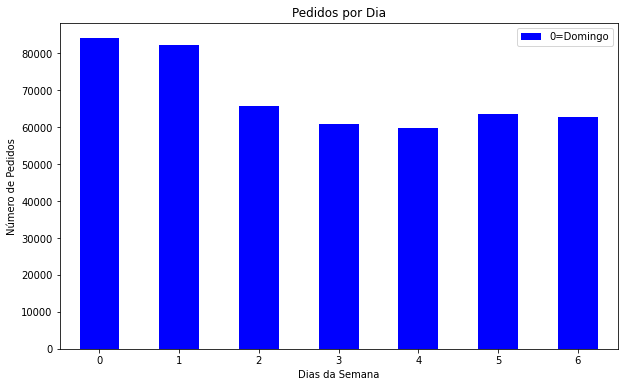

In [38]:
order_per_day = df_orders['order_dow'].value_counts().sort_index()

order_per_day.plot(kind='bar', title='Pedidos por Dia', color='blue', figsize=(10, 6), xlabel='Dias da Semana', ylabel='Número de Pedidos', rot=0)

plt.legend(['0=Domingo'])

plt.show()

Escreva suas conclusões aqui
- De acordo com análises, os dias em que as pessoas mais fazem pedidos é o Domingo e a Segunda.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição de compras por dia da semana
- As conclusões foram apresentadas
</div>


### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

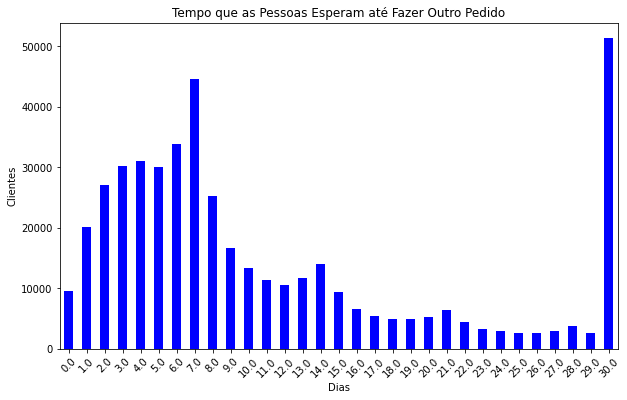

In [39]:
since_last_order = df_orders['days_since_prior_order'].value_counts().sort_index()

since_last_order.plot(kind='bar', title='Tempo que as Pessoas Esperam até Fazer Outro Pedido', color='blue', figsize=(10, 6), xlabel='Dias', ylabel='Clientes', rot=45)


plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Apresente suas conclusões.
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
- Nos primeiros 7 dias(primeira semana) após o pedidos possui um alta significativa, e após cada semana possui um leve aumento. Logo, de 7 em 7 dias é possivel observar um aumento, de acordo com o grafico.
</div> 


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

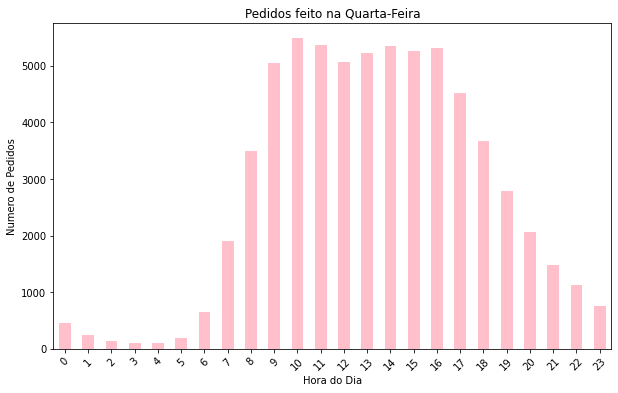

In [40]:
orders_wed = df_orders[df_orders['order_dow']==2]['order_hour_of_day'].value_counts().sort_index()
orders_wed.plot(kind='bar', title='Pedidos feito na Quarta-Feira', color='pink', figsize=(10, 6), xlabel='Hora do Dia', ylabel='Numero de Pedidos', rot=45)
plt.show()

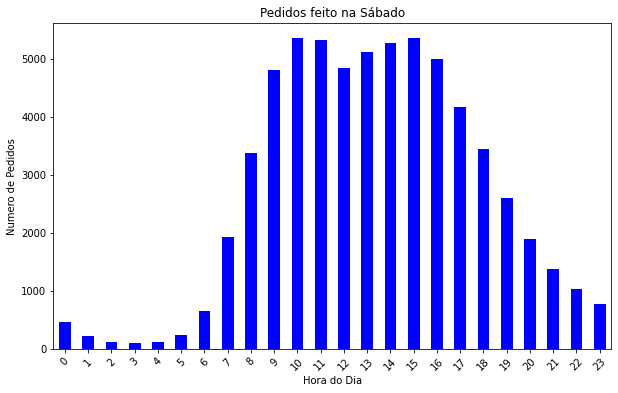

In [41]:
orders_sat = df_orders[df_orders['order_dow']==5]['order_hour_of_day'].value_counts().sort_index()
orders_sat.plot(kind='bar', title='Pedidos feito na Sábado', color='blue', figsize=(10, 6), xlabel='Hora do Dia', ylabel='Numero de Pedidos', rot=45)
plt.show()

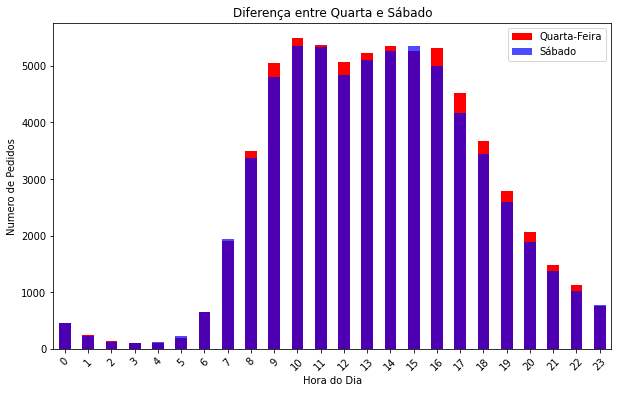

In [42]:
orders_wed = df_orders[df_orders['order_dow']==2]['order_hour_of_day'].value_counts().sort_index()
orders_wed.plot(kind='bar', title='Diferença entre Quarta e Sábado', color='red', figsize=(10, 6), xlabel='Hora do Dia', ylabel='Numero de Pedidos', rot=45)
orders_sat = df_orders[df_orders['order_dow']==5]['order_hour_of_day'].value_counts().sort_index()
orders_sat.plot(kind='bar', title='Diferença entre Quarta e Sábado', color='blue', figsize=(10, 6), xlabel='Hora do Dia', ylabel='Numero de Pedidos', rot=45, alpha=0.70)
plt.legend(['Quarta-Feira', 'Sábado'])
plt.show()


Escreva suas conclusões aqui
- De acordo com o gráfico, é possível observar que nas quartas-feiras há um maior número de pedidos nas horas 1:00, 2:00, e das 8:00 às 22:00.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante comparou as distribuições de pedidos feitos na Quarta-feira e aos Sábados
- As conclusões foram apresentadas
</div>


### [B2] Qual é a distribuição do número de pedidos por cliente?

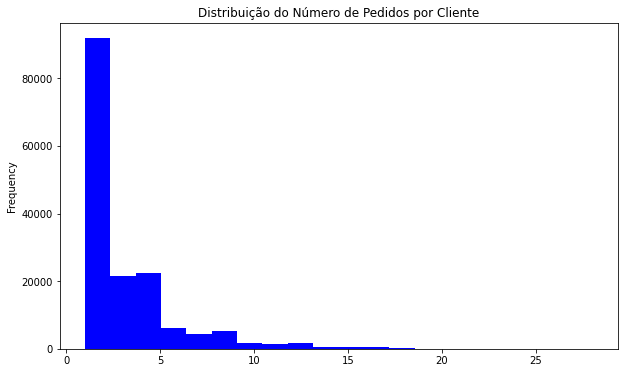

In [43]:
order_per_client = df_orders.groupby('user_id')['order_id'].nunique()

#gráfico 
order_per_client.plot(kind='hist', bins=20, title='Distribuição do Número de Pedidos por Cliente', color='blue', xlabel='Número de Pedidos', ylabel='Número de Clientes', figsize=(10, 6))
plt.show()

Escreva suas conclusões aqui
- De acordo com o gráfico, a maioria dos clientes realizam apenas de 1-5 pedidos.


### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [53]:
df_merge = df_order_products.merge(df_products, on='product_id')
top_products = df_merge.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending=False)
print(top_products.head(20))



                                     order_id  add_to_cart_order  reordered  \
product_id product_name                                                       
24852      banana                       66050              66050      66050   
13176      bag of organic bananas       53297              53297      53297   
21137      organic strawberries         37039              37039      37039   
21903      organic baby spinach         33971              33971      33971   
47209      organic hass avocado         29773              29773      29773   
47766      organic avocado              24689              24689      24689   
47626      large lemon                  21495              21495      21495   
16797      strawberries                 20018              20018      20018   
26209      limes                        19690              19690      19690   
27845      organic whole milk           19600              19600      19600   
27966      organic raspberries          19197      

Escreva suas conclusões aqui
- Fizemos a filtragem dos 20 pedidos mais desejados pelos clientes.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

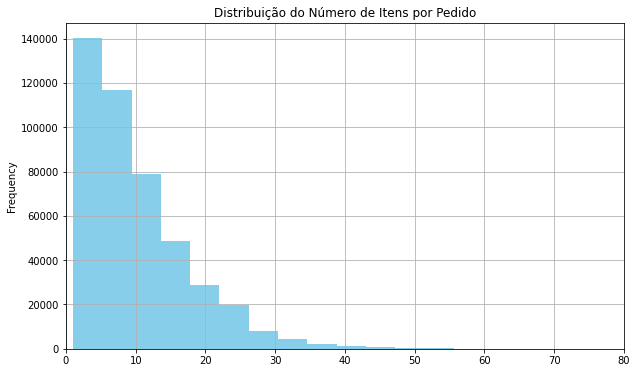

In [46]:
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

#histograma
items_per_order.plot(kind='hist', bins=30, title='Distribuição do Número de Itens por Pedido', color='skyblue', xlabel='Número de Itens', ylabel='Número de Pedidos', figsize=(10, 6), xlim=[0,80])

plt.grid(True)
plt.show()

Escreva suas conclusões aqui
- De acordo com o histograma, a maioria dos pedidos possuem menos de 10 itens.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Perfeito!
    
Você plotar anotar os eixos do gráfico usando a figura `plt` diretamente. Referência: 

https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/
</div>


### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [54]:
merged_df = pd.merge(df_order_products, df_products, on='product_id') #mesclar
first_add_cart = merged_df[merged_df['add_to_cart_order'] == 1] #produtos que foram adicionados como primeiro no carrinho
first_add_count = first_add_cart['product_name'].value_counts().reset_index() #quantas vezes cada produto foi adicionado como primeiro no carrinho
first_add_count.columns = ['product_name', 'count'] # Renomear as colunas

print(first_add_count.head(20))

                   product_name  count
0                        banana  15562
1        bag of organic bananas  11026
2            organic whole milk   4363
3          organic strawberries   3946
4          organic hass avocado   3390
5          organic baby spinach   3336
6               organic avocado   3044
7                  spring water   2336
8                  strawberries   2308
9           organic raspberries   2024
10   sparkling water grapefruit   1914
11          organic half & half   1797
12                  large lemon   1737
13                         soda   1733
14     organic reduced fat milk   1397
15                        limes   1370
16                hass avocados   1340
17  organic reduced fat 2% milk   1310
18                  half & half   1309
19         organic yellow onion   1246


Escreva suas conclusões aqui
- Foi identificado que a Banana é o produto em que as pessoas colocam nos carrinhos antes de todos os outros.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Correto. Dica: você poderia fazer o filtro ```merged_df['add_to_cart_order'] == 1``` antes mesmo do `merge` entre as tabelas.
</div>


# Conclusão geral do projeto:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
- O projeto abordou vários temas relacionados à Instacart, como: resolução de problemas, análise e visualização de dados, limpeza dos dados, entre outros. No geral, tive um pouco de dificuldade para realizar o projeto, porém ele proporcionou uma compreensão abrangente sobre os comportamentos dos clientes, além de permitir a aplicação prática das análises da Instacart. 
</div> 